# Challenge data posos

Le but du projet est de battre les 16% d'erreurs de Posos sur la classification des intentions derrière les questions médicales

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import itertools
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.collections import Counter

 
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
#nltk.download()

### Upload des données 

In [4]:
df_input = pd.read_csv('DATA/clean_input_train_2.csv', sep=";", index_col=0)
df_output = pd.read_csv('DATA/output_train.csv', sep=";", index_col=0)

features = df_input.columns
y = [x[0] for x in df_output.values]
X = [x[0] for x in df_input.values]

### Pré-traitement des données

In [ ]:
def tokenize(raw_corpus):
    tokenizer = RegexpTokenizer(r'\w+')
    stopWords = set(stopwords.words('french'))
    corpus = []

    for text in raw_corpus:
        tokens = tokenizer.tokenize(text[0])
        corpus.append([w for w in tokens if w not in stopWords])
        
    return corpus

In [ ]:
raw_corpus = df_input.values
corpus = tokenize(raw_corpus)

### Exploration des données 

In [ ]:
def get_ngrams(corpus,n=None):
    if n is None : 
        n = 3
        
    frequencies = Counter([])
    
    for tokens in corpus:
        grams_of_text = ngrams(tokens,n)
        frequencies += Counter(grams_of_text)
        
    return corpus, frequencies

### Création d'un vocabulaire

In [ ]:
n = 1
input_ngrams, frequencies = get_ngrams(corpus,n)
vocabulary = []
for text  in input_ngrams:
    for ng in text:
        if ng not in vocabulary:
            vocabulary.append(ng)

### TFID vectorize

In [5]:
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',
                            ngram_range =(1,3), stop_words={'french'})

In [6]:
X_preprocessed = tfid_vectorizer.fit_transform(X)

In [7]:
X_to_split, X_validation, y_to_split, y_validation = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_to_split, y_to_split, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(5137, 103645)

### Use sklearn to find a correct classifier

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# KNN 

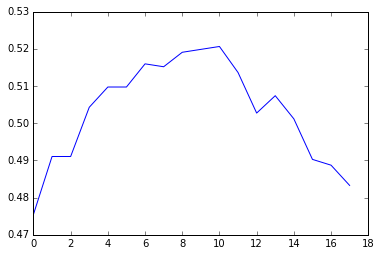

In [10]:
scores_knn = []
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=3)
    knn.fit(X_train,y_train)
    scores_knn.append(knn.score(X_test,y_test))
plt.plot(scores_knn)
plt.show() #9 est le nombre de voisins optimal mais l'on n'obtient pas mieux que 52,8%

In [11]:
knn = KNeighborsClassifier(n_neighbors=11, n_jobs=3)
knn.fit(X_train,y_train)
print('score : {}'.format(knn.score(X_test,y_test)))

score : 0.5198443579766537


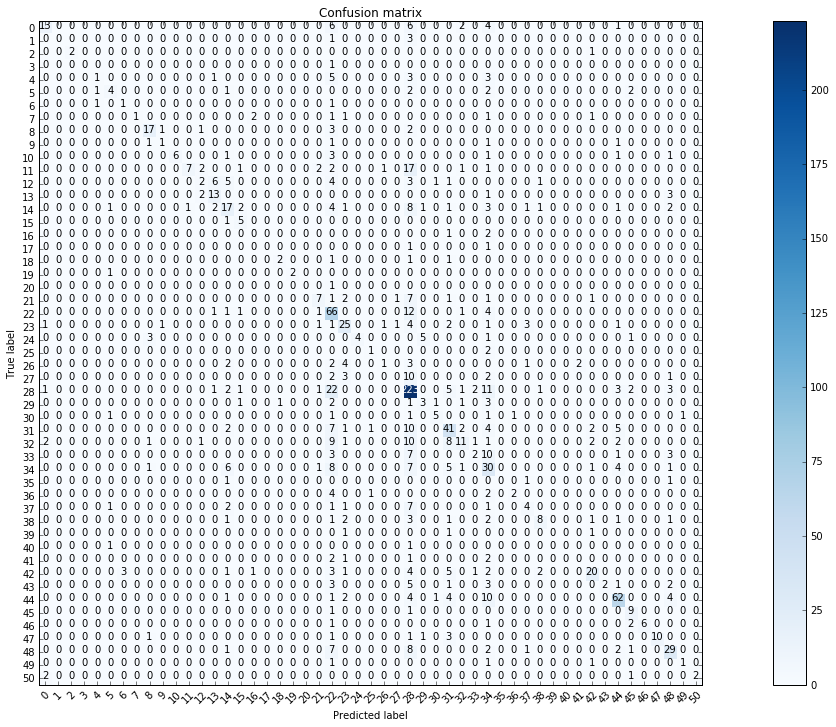

In [12]:
classes = knn.classes_
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix,classes)
plt.show()

### MLP classifier

iteration number 10
iteration number 20
iteration number 30
iteration number 40


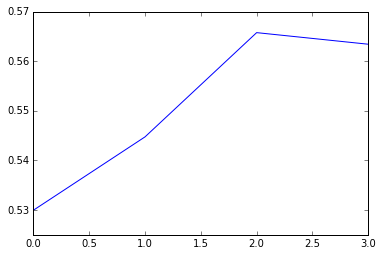

In [13]:
scores_mlp = []
for i in range(10,50, 10):
    print('iteration number {}'.format(i))
    mlp = MLPClassifier(hidden_layer_sizes=(i), solver='lbfgs',activation='logistic', early_stopping = True, max_iter=100)
    mlp.fit(X_train,y_train)
    scores_mlp.append(mlp.score(X_test,y_test))
plt.plot(scores_mlp)
plt.show()

In [ ]:
scores_mlp = []
for i in range(50,1000, 100):
    print('iteration number {}'.format(i))
    mlp = MLPClassifier(hidden_layer_sizes=(i), solver='lbfgs',activation='logistic', early_stopping = True, max_iter=100)
    mlp.fit(X_train,y_train)
    scores_mlp.append(mlp.score(X_test,y_test))
plt.plot(scores_mlp)
plt.show()

iteration number 50


In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
classes = mlp.classes_
plot_confusion_matrix(cnf_matrix,classes)
plt.show()

### D'autres classifiers potentiels

In [ ]:

n_estimators = 30
svc = SVC(gamma = 0.1)
nb_gaussian = GaussianNB()
bagging = BaggingClassifier(n_estimators=n_estimators, n_jobs=3)
grad_boost = GradientBoostingClassifier(n_estimators=n_estimators, verbose=1)
xtrees = ExtraTreesClassifier(n_estimators=n_estimators)
ada = AdaBoostClassifier(n_estimators=n_estimators)